# ForMoSA

## Performing the nested sampling

In [1]:

import sys, os, time
import numpy as np
import matplotlib.pyplot as plt
import time

# Give the path to ForMoSA to be able to import it. No need when this will be a pip package
base_path = '/Users/ppalmabifani/Desktop/exoAtm/c0_ForMoSA/ForMoSA/ForMoSA/' 
sys.path.insert(1, base_path)

# for the interpolation & sampling
from main_utilities import yesno
from main_utilities import GlobFile
from adapt.adapt_obs_mod import launch_adapt
from nested_sampling.nested_sampling import launch_nested_sampling
from adapt.extraction_functions import continuum_estimate

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# for the plots
from plotting.plotting_class import ComplexRadar
from plotting.plotting_class import PlottingForMoSA


-> Configuration of environment

In [2]:
config_file_path = '/Users/ppalmabifani/Desktop/exoAtm/c0_ForMoSA/ForMoSA/DEMO/outputs_ultranest/test_config_ABPicb_ultranest.ini'

## CONFIG_FILE reading and defining global parameters
global_params = GlobFile(config_file_path)    


# CONFIG_FILE for specific run is saved with outputs 
## Allows to: Check parameters / Re-run
time_now = time.strftime("%Y%m%d_%H%M%S")
global_params.result_path = global_params.result_path+ '_t' + time_now+'/'
os.makedirs(global_params.result_path)

global_params.config.filename = global_params.result_path + 'config_used.ini'
global_params.config['config_path']['result_path']=global_params.result_path
global_params.config.write()

-> Initializing ForMoSA

In [3]:
# Have you already interpolated the grids for this data? 
y_n_par = 'yes'
#y_n_par = 'no'

launch_adapt(global_params, justobs=y_n_par)

-> Nested sampling

In [5]:
launch_nested_sampling(global_params)

# Nestle notes
# it=   284 logz=-973.1927726 ->  dlogz=5
# it=   218 logz=-970.0554364
# it=   363 logz=-972.4954250 ->  dlogz=1
# it=   253 logz=-966.0373170 ->  dlogz=None

# it=   388 logz=-967.32910300 -> decline_factor=5
# it=   278 logz=-970.1459756 -> decline_factor=0.1


# Ultranest notes


AttributeError: 'ReactiveNestedSampler' object has no attribute 'results'

## Now we plot!

In [26]:
# Initialize the plotting class

config_file_path = '/Users/ppalmabifani/Desktop/exoAtm/c0_ForMoSA/ForMoSA/DEMO/outputs_ultranest/_t20230606_101850/'

plotForMoSA = PlottingForMoSA(config_file_path+'config_used.ini', 'magenta')

ForMoSA - Corner plot


KeyboardInterrupt: 

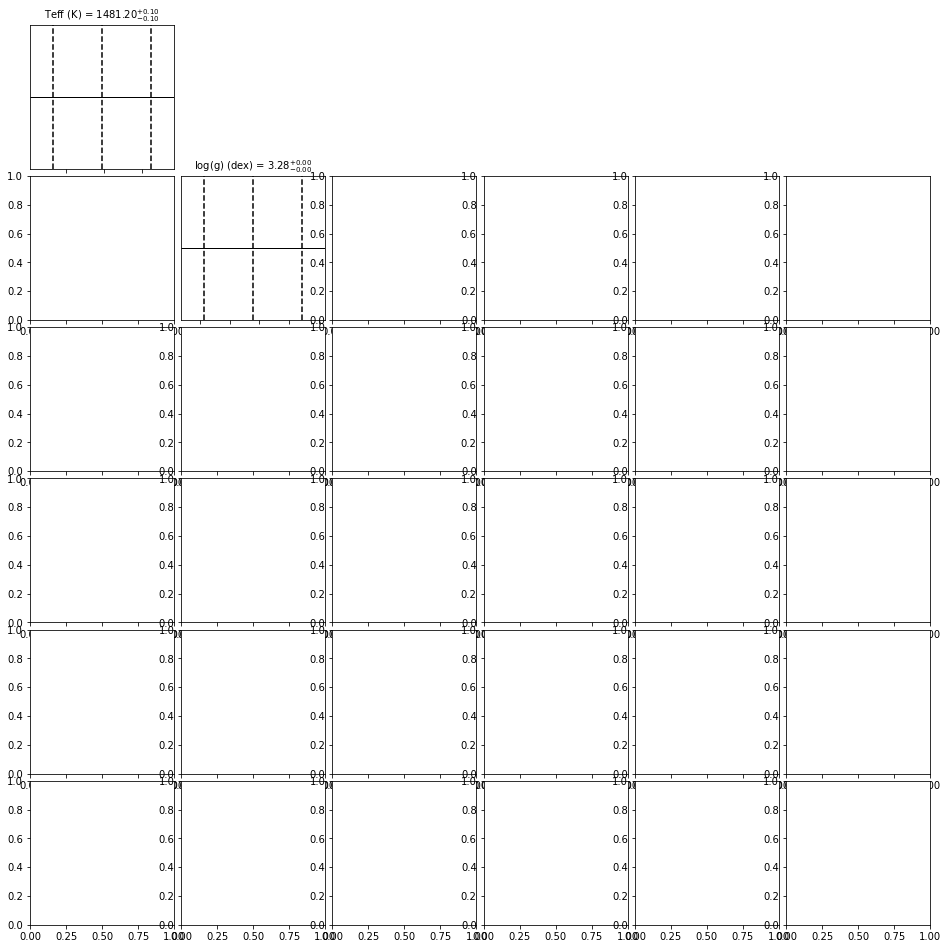

In [28]:
# PLOT: Corner plot
# plotting functions return the fig object -> you can edit the axes, overplot text/curves, save, etc...
plotForMoSA.plot_corner(levels_sig=[0.997, 0.95, 0.68], bins=100, quantiles=(0.16, 0.5, 0.84), burn_in=0)
#plt.savefig('') 
plt.show()

# PLOT: Chains of posteriors
plotForMoSA.plot_chains(figsize=(10,10))
#plt.savefig('')
plt.show()

# PLOT: Radar plot
# You need to define the ranges for each parameter, looking at the chain plots can be useful
ranges = [(1200,2000),
          (2.5,4.7),
          (-0.1,0.8),
          (0,1),
          (1,5),
          #(-30,150),
          (-4,-1)]
plotForMoSA.plot_radar(ranges,label='AB Pic b, K band',quantiles=[0.16, 0.5, 0.84],chiffres=[0,2,2,2])
plt.show()

# PLOT: Spectra and residuals
plotForMoSA.plot_fit(figsize=(10, 5), uncert='no')
plt.show()


In [22]:
# You can access to some parametes since we are working with a class
posteriors_chains = plotForMoSA.posterior_to_plot
posteriors_names = plotForMoSA.posteriors_names
